In [54]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [55]:
df = pd.read_csv('copy_web_scraping_final.csv')

In [56]:
#df.info()
df.shape

(988, 71)

In [63]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge 
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

lm = LinearRegression()

#drop 'lifetime_gross' because that is the target (y value) value 
X, y = df.drop(['lifetime_gross', 'rank', 'release date','title','link_stub','key_0','genre'], axis=1), df['lifetime_gross']
X['B_x_A'] = X['budget'] * X['Action']

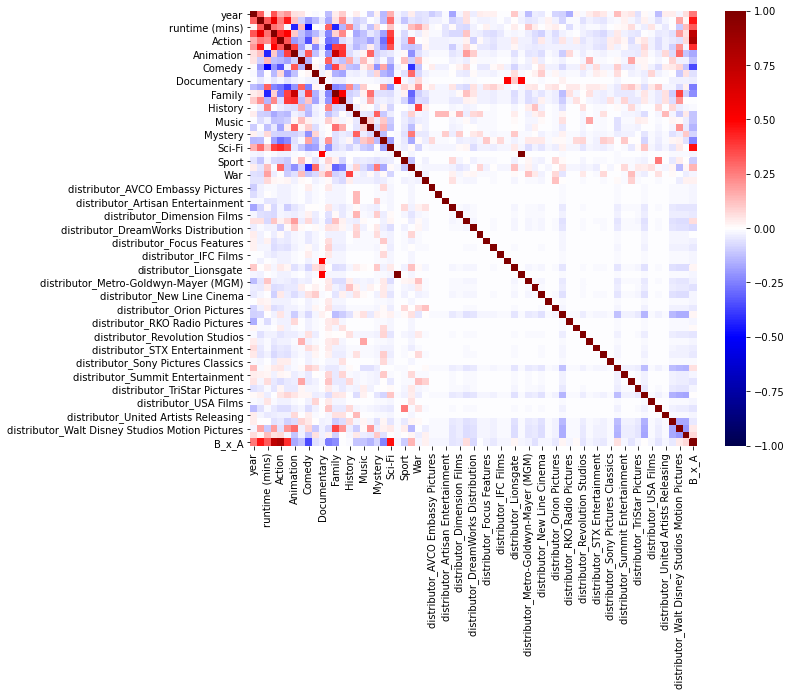

In [64]:
#heatmap
plt.subplots(figsize=(10,8))
sns.heatmap(X.corr(), cmap="seismic", vmin=-1, vmax=1);
plt.savefig("movie_features_heatmap.png")

In [65]:
# split data

X, X_test, y, y_test = train_test_split(X, y, test_size=.2, random_state=10)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=.2, random_state=8)

In [66]:
#60%
X_train.shape

(632, 65)

In [67]:
#20%
X_val.shape

(158, 65)

In [68]:
#20%
X_test.shape

(198, 65)

In [69]:
from sklearn.model_selection import (cross_val_score, train_test_split)

scores = cross_val_score(lm, X_train, y_train)
print("Linear Reg Mean Score: ", round(np.mean(scores),3))

Linear Reg Mean Score:  0.794


In [70]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train.values)
X_val_scaled = scaler.transform(X_val.values)
X_test_scaled = scaler.transform(X_test.values)

lm_reg = Ridge(alpha=1)

poly = PolynomialFeatures(degree=2) 

X_train_poly = poly.fit_transform(X_train.values)
X_val_poly = poly.transform(X_val.values)
X_test_poly = poly.transform(X_test.values)

lm_poly = LinearRegression()

In [71]:
#validate and score

lm.fit(X_train, y_train)
print(f'Linear Regression val R^2: {lm.score(X_val, y_val):.3f}')
print(f'Linear Regression train R^2: {lm.score(X_train, y_train):.3f}')

lm_reg.fit(X_train_scaled, y_train)
print(f'Ridge Regression val R^2: {lm_reg.score(X_val_scaled, y_val):.3f}')
print(f'Ridge Regression train R^2: {lm_reg.score(X_train_scaled, y_train):.3f}')

lm_poly.fit(X_train_poly, y_train)
print(f'Degree 2 Polynomial Regression val R^2: {lm_poly.score(X_val_poly, y_val):.3f}')
print(f'Degree 2  Polynomial Regression train R^2: {lm_poly.score(X_train_poly, y_train):.3f}')

X_val_lasso = std.transform(X_val.values)
print(f'Lasso CV Regression val R^2: {lasso_model.score(X_val_lasso, y_val):.3f}')
print(f'Lasso CV Regression train R^2: {lasso_model.score(X_train_lasso, y_train):.3f}')

Linear Regression val R^2: 0.812
Linear Regression train R^2: 0.842
Ridge Regression val R^2: 0.822
Ridge Regression train R^2: 0.842
Degree 2 Polynomial Regression val R^2: -6.311
Degree 2  Polynomial Regression train R^2: 0.624


ValueError: X has 65 features, but StandardScaler is expecting 64 features as input.

In [72]:
#scale X matrix then lasso CV (finds optimal alpha)
# Scale the data
std = StandardScaler()
std.fit(X_train.values)

# Scale the Predictors on both the train
X_train_lasso = std.transform(X_train.values)

In [73]:
from sklearn.linear_model import LassoCV
#find the best alpha, refit model on all the data with alpha

alphavec = 10**np.linspace(-2,2,200)

lasso_model = LassoCV(alphas = alphavec, cv=5)
lasso_model.fit(X_train_lasso, y_train)

/Users/sheraleelovejoy/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.942088772436787e+16, tolerance: 549514372215009.94
  model = cd_fast.enet_coordinate_descent_gram(
/Users/sheraleelovejoy/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.9420760823972736e+16, tolerance: 549514372215009.94
  model = cd_fast.enet_coordinate_descent_gram(
/Users/sheraleelovejoy/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.942064047073421e+16, tolerance: 549514372215009.94
  model = cd_fast.enet_coordinate_descent_gram(
/Users/shera

LassoCV(alphas=array([1.00000000e-02, 1.04737090e-02, 1.09698580e-02, 1.14895100e-02,
       1.20337784e-02, 1.26038293e-02, 1.32008840e-02, 1.38262217e-02,
       1.44811823e-02, 1.51671689e-02, 1.58856513e-02, 1.66381689e-02,
       1.74263339e-02, 1.82518349e-02, 1.91164408e-02, 2.00220037e-02,
       2.09704640e-02, 2.19638537e-02, 2.30043012e-02, 2.40940356e-02,
       2.52353917e-02, 2.64308149e-0...
       3.44896226e+01, 3.61234270e+01, 3.78346262e+01, 3.96268864e+01,
       4.15040476e+01, 4.34701316e+01, 4.55293507e+01, 4.76861170e+01,
       4.99450512e+01, 5.23109931e+01, 5.47890118e+01, 5.73844165e+01,
       6.01027678e+01, 6.29498899e+01, 6.59318827e+01, 6.90551352e+01,
       7.23263390e+01, 7.57525026e+01, 7.93409667e+01, 8.30994195e+01,
       8.70359136e+01, 9.11588830e+01, 9.54771611e+01, 1.00000000e+02]),
        cv=5)

In [74]:
'''X_val_lasso = std.transform(X_val.values)
print(f'Lasso CV Regression val R^2: {lasso_model.score(X_val_lasso, y_val):.3f}')
print(f' Lasso CV Regression train R^2: {lasso_model.score(X_train_lasso, y_train):.3f}')'''

"X_val_lasso = std.transform(X_val.values)\nprint(f'Lasso CV Regression val R^2: {lasso_model.score(X_val_lasso, y_val):.3f}')\nprint(f' Lasso CV Regression train R^2: {lasso_model.score(X_train_lasso, y_train):.3f}')"

In [75]:
len(list(zip(X_train.columns, lasso_model.coef_)))

65

In [76]:
#create poly features
#X['BR'] = X['budget'] * X['runtime (mins)']
#X['B2'] = X['budget'] ** 2
#X['B_/_R'] = X['budget'] / X['runtime (mins)']
X['B_x_A'] = X['budget'] * X['Action']

In [77]:
scores = cross_val_score(lm_reg, X_train_scaled, y_train)
print("Ridge Reg Mean Score: ", round(np.mean(scores),3))

Ridge Reg Mean Score:  0.796


In [78]:
X.shape

(790, 65)

In [79]:
#refit to model then plot
X_refit = scaler.fit_transform(X.values)
lm_reg.fit(X_refit, y)
X_test_scaled = scaler.transform(X_test.values)
print(round(lm_reg.score(X_test_scaled, y_test),3))
print(round(lm_reg.score(X_refit, y),3))
lm_reg.coef_
list(zip(X.columns, lm_reg.coef_))

0.854
0.842


[('year', -9375688.445272457),
 ('worldwide gross', 96441486.95386693),
 ('runtime (mins)', -801441.1588440548),
 ('budget', -7041624.961546919),
 ('Action', 5201046.542558672),
 ('Adventure', -5595043.914887135),
 ('Animation', -772125.1861985222),
 ('Biography', 2101869.265236467),
 ('Comedy', 5126543.325321779),
 ('Crime', 495304.3962773605),
 ('Documentary', -1264206.4501117452),
 ('Drama', -757354.9591524751),
 ('Family', -2540209.9762904705),
 ('Fantasy', -1052983.3983637693),
 ('History', -1296493.1184152067),
 ('Horror', -541029.5555627821),
 ('Music', 184628.77681276464),
 ('Musical', -9294.660106490772),
 ('Mystery', -1206282.6968629614),
 ('Romance', -3387525.13488579),
 ('Sci-Fi', 4400033.735790413),
 ('Short', -377004.01631882036),
 ('Sport', 783781.6590354574),
 ('Thriller', -5803365.406814447),
 ('War', 1952777.3653457887),
 ('Western', 386056.74883349426),
 ('distributor_AVCO Embassy Pictures', 0.0),
 ('distributor_American International Pictures (AIP)', -1481455.457385

In [51]:
# Make predictions on the test set using the new model
preds = lm_reg.predict(X)
print(y)

580    116089678
411    141340178
709    102084362
12     532177324
787     94784201
         ...    
369    150357137
320    162994032
527    123922370
125    251513985
265    177243721
Name: lifetime_gross, Length: 790, dtype: int64


In [39]:
#rmse; better to talk about performance ('error = predictions were off on avg by $')
def RMSE(actuals, preds): 
    return np.sqrt(np.mean((actuals - preds)**2))

RMSE(y,preds)

2.4190802445964955e+23